In [141]:
import numpy as np
import sympy as sp
from sympy import S, Symbol, symbols, solve, solveset, plot, plot_parametric, And, plot_implicit
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Latex
from sympy import latex

## Занятие 14
## Математический анализ
## Функции нескольких переменных.
### Задание 1
Изобразить на рисунках область определения функций

1) $z=\ln(x^2+y)$

2) $z=\sqrt{\sin(x^2+y^2)}$

3) $z=\sqrt{x^2-4}+\sqrt{9-y^2}$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

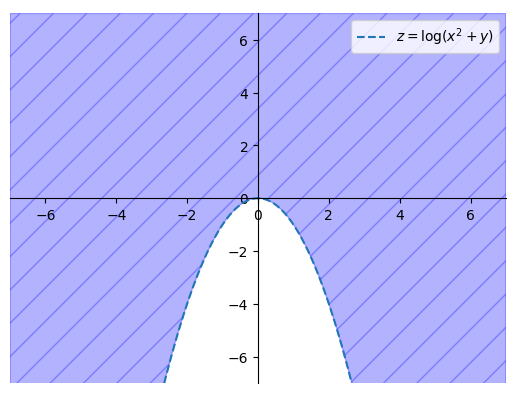

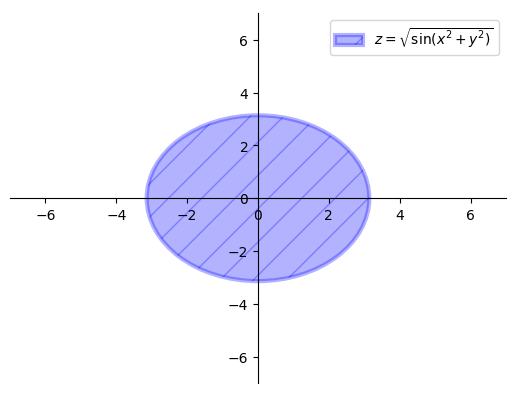

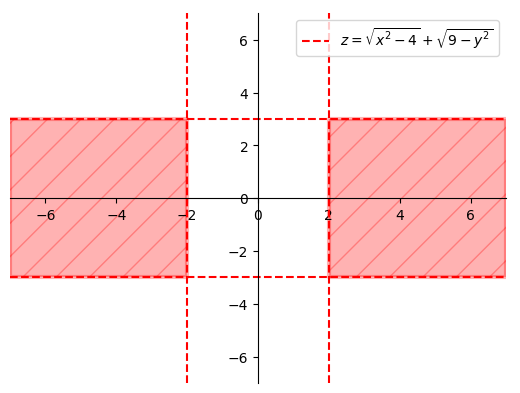

In [142]:
x, y = symbols('x y')

display(Latex(fr"$1.\ x^2 + y > 0$"))
display(Latex(
    fr"$2.\ \sin (x^2 + y^2) \geqslant 0 \Rightarrow  0 \leqslant x^2 + y^2 \leqslant \pi \Rightarrow x^2 + y^2 \leqslant \pi$"))
display(Latex(fr"$3.\ x^2 \geqslant 4 \wedge y^2 \leqslant 9$"))

fig, ax1 = plt.subplots()
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['left'].set_position(('data', 0))
ax1.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax1.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax1.set(xlim=(-7, 7), ylim=(-7, 7))

X1 = np.linspace(-7, 7, 1400)
Y1 = [-x ** 2 for x in X1]
ax1.plot(X1, Y1, linestyle='--', label=fr"$z = \log (x^2 + y)$")
X_fill_1 = np.linspace(-7, 7, 1400)
ax1.fill_between(X_fill_1, [-x ** 2 for x in X_fill_1], [7 for i in range(len(X_fill_1))], hatch="/", color="blue",
                 alpha=0.3)

ax1.legend()

fig, ax2 = plt.subplots()
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_position(('data', 0))
ax2.spines['left'].set_position(('data', 0))
ax2.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax2.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax2.set(xlim=(-7, 7), ylim=(-7, 7))

circle_pi = plt.Circle((0, 0), np.pi, alpha=0.3, ec='b', fc='b', hatch='/', linewidth=3,
                       label=fr"$z = \sqrt{{\sin (x^2 + y^2)}}$")
ax2.add_patch(circle_pi)

ax2.legend()

fig, ax3 = plt.subplots()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['bottom'].set_position(('data', 0))
ax3.spines['left'].set_position(('data', 0))
ax3.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax3.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax3.set(xlim=(-7, 7), ylim=(-7, 7))

ax3.axvline(x=-2, color='r', linestyle='--', label=fr"$z=\sqrt{{x^2-4}}+\sqrt{{9-y^2}}$")
ax3.axvline(x=2, color='r', linestyle='--', clip_on=False)
ax3.axhline(y=-3, color='r', linestyle='--')
ax3.axhline(y=3, color='r', linestyle='--')

X_fill_3_left = np.linspace(-7, -2, 500)
ax3.fill_between(X_fill_3_left, [3 for i in range(len(X_fill_3_left))], [-3 for i in range(len(X_fill_3_left))],
                 hatch="/", color="r", alpha=0.3, ec='r', linewidth=3)

X_fill_3_left = np.linspace(2, 7, 500)
ax3.fill_between(X_fill_3_left, [3 for i in range(len(X_fill_3_left))], [-3 for i in range(len(X_fill_3_left))],
                 hatch="/", color="r", alpha=0.3, ec='r', linewidth=3)

ax3.legend()

### Задача 2.
Построить на отдельных графиках линии уровня функций $z=\ln(x^2+y)$ и $z=x^2-y^2$.

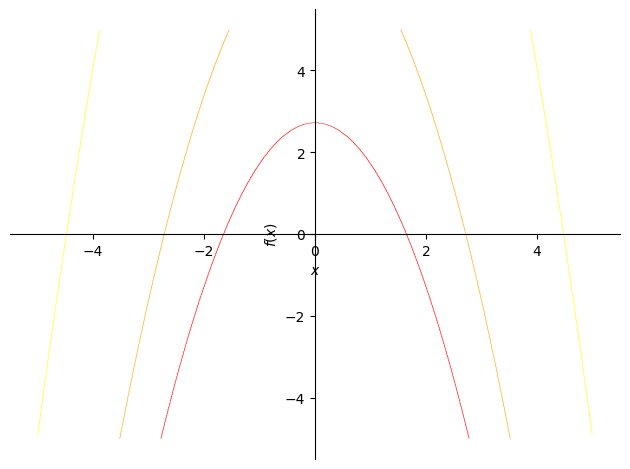

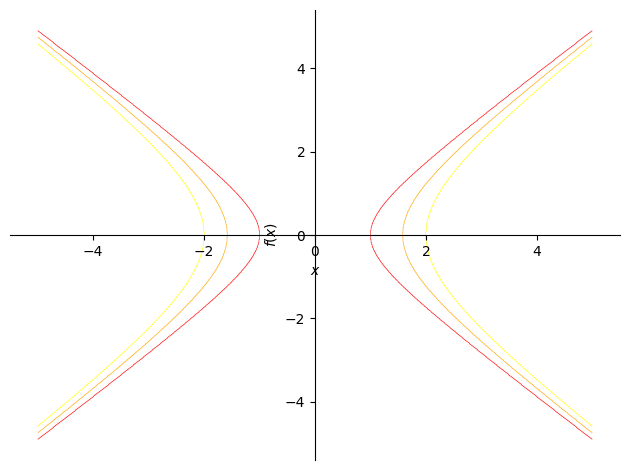

In [143]:
z_1 = sp.log(x ** 2 + y)
z_2 = x ** 2 - y ** 2


def contour_line(z, C):
    return sp.Eq(z, C)


plots = plot(show=False)

for C, color in [[1, 'r'], [2, 'orange'], [3, 'yellow']]:
    plots.extend(plot_implicit(contour_line(z_1, C), line_color=color, show=False))
plots.show()

plots = plot(show=False)

for C, color in [[1, 'r'], [2.5, 'orange'], [4, 'yellow']]:
    plots.extend(plot_implicit(contour_line(z_2, C), line_color=color, show=False))
plots.show()

### Задача 3.
Найти и изобразить поверхности уровня функции $u=(x-1)^2+(y-2)^2+z^2$.

-sqrt(c - x**2 + 2*x - y**2 + 4*y - 5)

sqrt(c - x**2 + 2*x - y**2 + 4*y - 5)

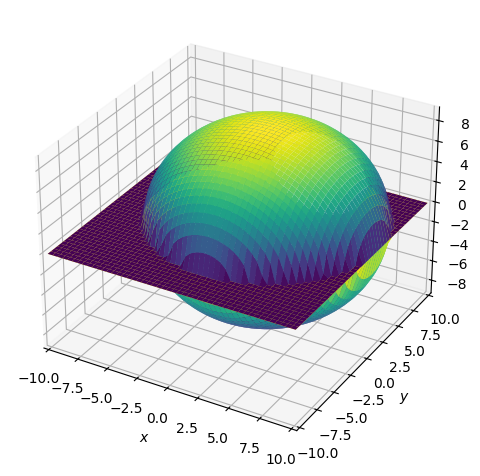

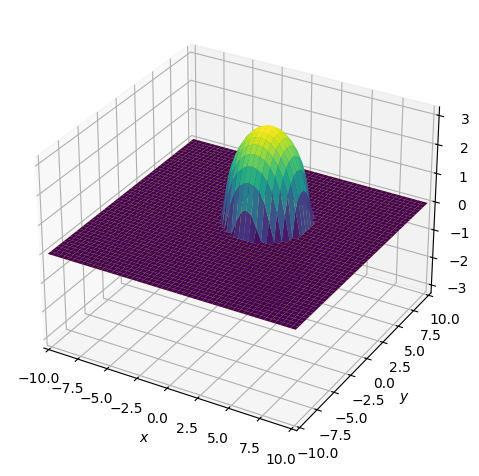

In [144]:
z, c = symbols('z c')
u = (x - 1) ** 2 + (y - 2) ** 2 + z ** 2
roots = sp.solve(sp.Eq(u, c), z)
display(*roots)

plot3d(roots[0].subs(c, 80), roots[1].subs(c, 80))
plot3d(roots[0].subs(c, 10), roots[1].subs(c, 10))

### Задача 4.
Найти точки разрыва функции $z=\frac1{(x - y^2)^2}$, изобразить их на графике.

<IPython.core.display.Latex object>

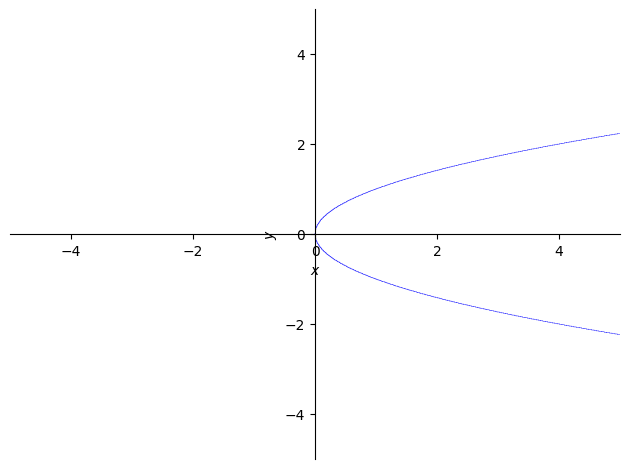

In [145]:
display(Latex(fr"$\text{{Точки разрыва определяются уравнением $(x - y^2)^2 = 0$ }}$"))
plot_implicit(((x - y ** 2) ** 2))


### Задача 5.
Найти частные производные по каждому аргументу функции $u=(xy)^z$

In [147]:
u = sp.Pow((x * y), z)
for variable in [x, y, z]:
    display(Latex(fr"${variable}:\ {latex(u.diff(variable))}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задача 6.
Проверить выполнение теоремы Эйлера для функции $f(x,y)=\frac{x}{x^2+y^2} $.
###### Указание.
Упростить выражение с помощью simplify, прежде чем сравнивать.

In [159]:
k = Symbol('k')
f_xy = x / (x ** 2 + y ** 2)

display(Latex(fr"$$ f(kx,\ ky) = {latex(f_xy.subs({x: x * k, y: y * k}))} = {latex(f_xy.subs({x: x * k, y: y * k}).simplify())} = k^{{-1}} {latex(f_xy)} \Rightarrow \text{{данная функция не однородная}}$$"))

<IPython.core.display.Latex object>

### Задача 7.
Найти полный дифференциал функции $z=\sin^2x+\cos^2y$

In [160]:
z = sp.sin(x) ** 2 + sp.cos(y) ** 2

dx, dy = symbols('dx dy')
dz = z.diff(x) * dx + z.diff(y) * dy
display(dz)

2*dx*sin(x)*cos(x) - 2*dy*sin(y)*cos(y)

### Индивидуальное задание
Построить линии уровня и найти полный дифференциал функции
$f(x, y)$.

#### Вариант 98


$f(x, y) = \frac{x y \sin{\left(\frac{3 x y}{2} \right)}}{3}$

Построить линии уровня для значений: $4$ - красным цветом, $1$ - зеленым цветом, $-4$ - желтым цветом

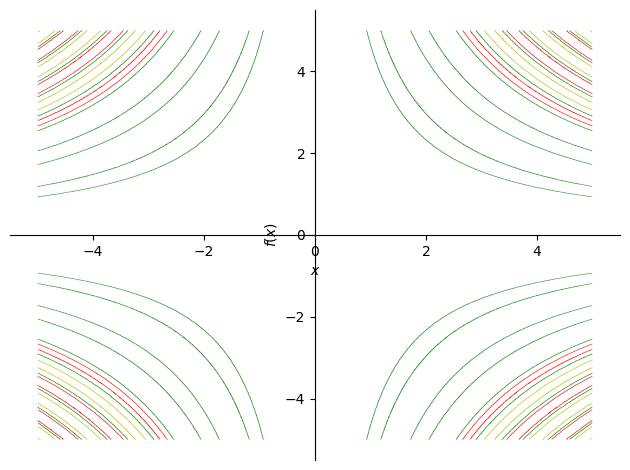

<IPython.core.display.Latex object>

In [172]:
f_xy = (x * y * sp.sin(3 * x * y / 2)) / 3

plots = plot(show=False)
for C, color in [[4, 'r'], [1, 'g'], [-4, 'y']]:
    plots.extend(plot_implicit(sp.Eq(f_xy, C), line_color=color, show=False))
plots.show()    

dz = f_xy.diff(x) * dx + f_xy.diff(y) * dy
display(Latex(fr"$$dz = {latex(dz.simplify())}$$"))